In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
results_by_year = {year : pd.read_csv('data/marathon_results_{}.csv'.format(year)) for year in range(2009,2020)}

In [3]:
results_by_year[2019]

,Bib,Name,Age,M/F,City,State,Country,5K,10K,15K,...,Half,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division
0,2,"Cherono, Lawrence",30,M,Eldoret,NaN,KEN,0:15:11,0:30:21,0:45:48,...,1:04:29,1:16:23,1:32:01,1:47:16,2:01:45,0:04:53,2:07:57,1,1,1
1,6,"Desisa, Lelisa",29,M,Ambo,NaN,ETH,0:15:10,0:30:22,0:45:46,...,1:04:30,1:16:24,1:32:01,1:47:16,2:01:46,0:04:53,2:07:59,2,2,2
2,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,KEN,0:15:14,0:30:22,0:45:47,...,1:04:31,1:16:24,1:32:01,1:47:16,2:01:45,0:04:54,2:08:07,3,3,3
3,8,"Kandie, Felix",32,M,Iten,NaN,KEN,0:15:14,0:30:24,0:45:47,...,1:04:31,1:16:24,1:32:01,1:47:16,2:02:08,0:04:55,2:08:54,4,4,4
4,11,"Kirui, Geoffrey",26,M,Keringet,NaN,KEN,0:15:12,0:30:21,0:45:46,...,1:04:28,1:16:23,1:32:01,1:47:16,2:01:57,0:04:56,2:08:55,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26651,23909,"Mcninch, Brett",42,M,New Lebanon,OH,USA,0:27:04,0:55:14,1:30:44,...,2:17:35,3:07:53,4:29:32,5:48:38,6:49:34,0:16:34,7:14:12,26653,14672,1989
26652,23949,"Oconell, Justin",28,M,Franklin,MA,USA,0:50:12,1:37:16,2:26:49,...,3:27:50,4:09:24,5:00:59,5:55:16,-,0:16:39,7:16:19,26654,14673,5092
26653,15946,"Young, John",53,M,Salem,MA,USA,0:39:21,1:24:43,2:12:26,...,3:21:04,4:06:20,5:03:30,6:01:14,-,0:16:42,7:17:35,26655,14674,1858
26654,23937,"Smith, Denise",51,F,Fort Collins,CO,USA,0:39:09,1:22:06,2:11:38,...,3:20:47,4:06:00,5:04:48,6:06:03,-,0:17:01,7:25:39,26656,11982,1200


In [4]:
def prepare_basic_line_chart(data, title, xlabel, ylabel):
    fig, ax = plt.subplots()
    fig.set_size_inches(12,8)
    fig.tight_layout(pad=4)
    fig.suptitle(title, fontsize=17)
    ax.plot(list(data.keys()), list(data.values()), linestyle='--', marker='o', color='b')
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_xticks(list(data.keys()))
    ax.set_xticklabels(list(data.keys()))
    plt.grid(linestyle='--')
    return fig, ax

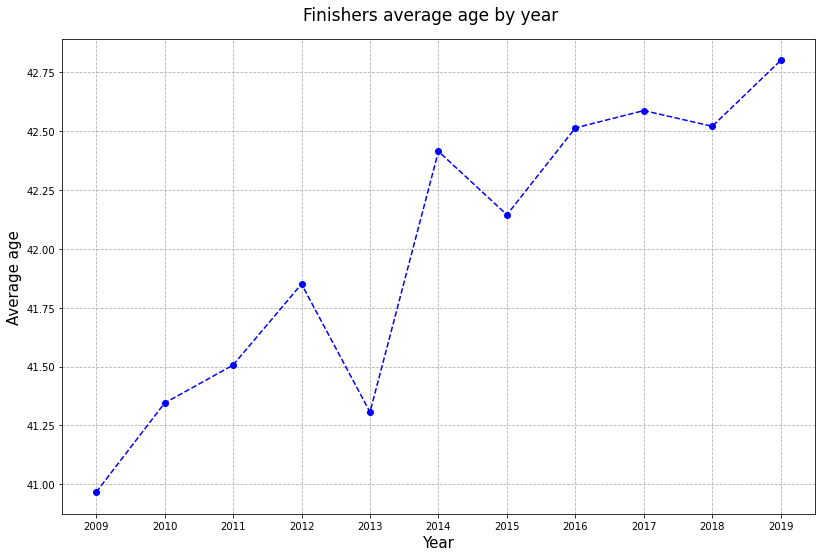

In [5]:
mean_ages = {year : results['Age'].mean() for year, results in results_by_year.items()}
prepare_basic_line_chart(mean_ages, 'Finishers average age by year', 'Year', 'Average age')
plt.savefig('img/finishers_avg_age_by_year.png')

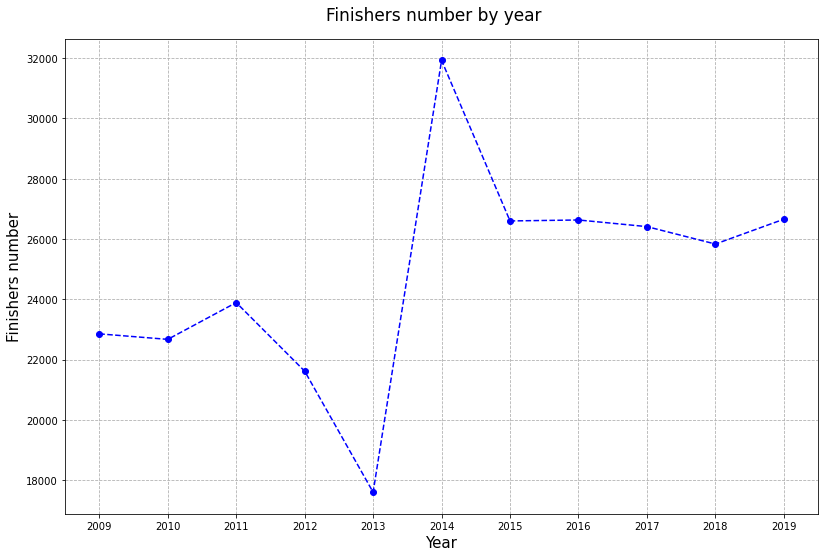

In [6]:
participants_number = {year : len(results) for year, results in results_by_year.items()}
prepare_basic_line_chart(participants_number, 'Finishers number by year', 'Year', 'Finishers number')
plt.savefig('img/finishers_num_by_year.png')

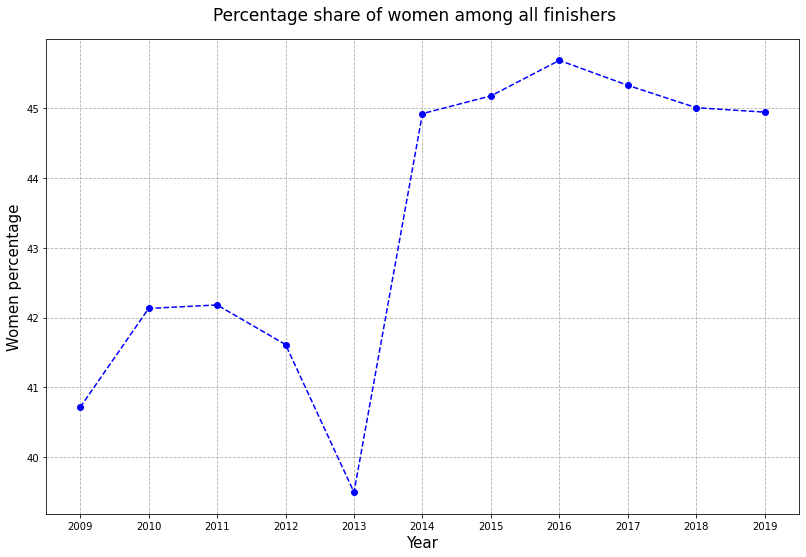

In [7]:
women_number = {year : len(results[results['M/F']=='F']) for year, results in results_by_year.items()}
women_percentage = {year : women/participants*100 for (year, women), participants in zip (women_number.items(), participants_number.values())}
prepare_basic_line_chart(women_percentage, 'Percentage share of women among all finishers', 'Year', 'Women percentage')
plt.savefig('img/percentage_women_finishers.png')

In [8]:
def timestamp_to_seconds(timestamp):
    split_time = timestamp.split(':')
    if len(split_time) !=3:
        split_time = timestamp.split('.')
    return int(split_time[0]) * 3600 + int(split_time[1]) * 60 + int(split_time[2])

def seconds_to_timestamp(seconds):
    seconds = int(round(float(seconds)))
    hh = seconds//3600
    mm = (seconds - hh * 3600)//60
    ss = seconds - hh * 3600 - mm * 60
    return '{}:{:02d}:{:02d}'.format(hh, mm, ss)

def get_mean_official_time(results):
    return int(round(results['Official Time'].map(timestamp_to_seconds).mean()))

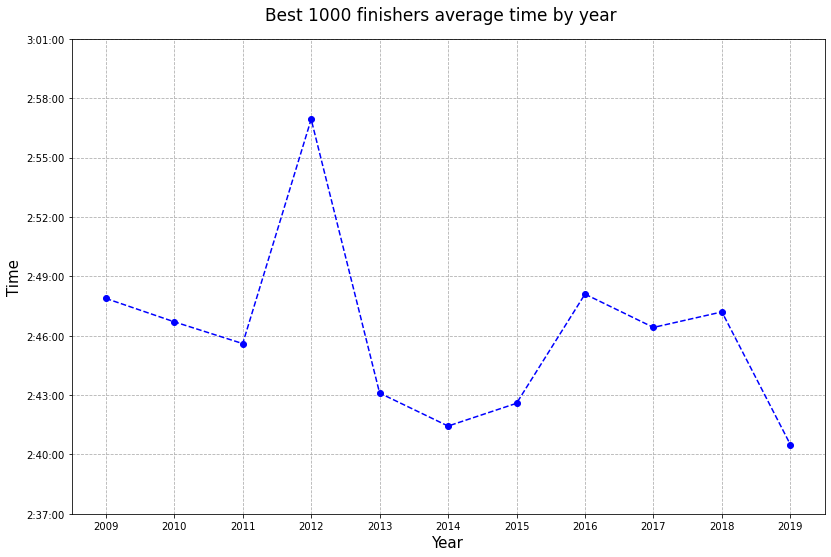

In [9]:
mean_times_best1000 = {year : get_mean_official_time(results.head(1000)) for year, results in results_by_year.items()}
fig, ax = prepare_basic_line_chart(mean_times_best1000, 'Best 1000 finishers average time by year', 'Year', 'Time')
plt.draw()
y_labels = [label.get_text() for label in ax.get_yticklabels()]
y_labels_range = np.arange(60*round(int(y_labels[0])/60), int(y_labels[-1]) + 180, 180)
ax.set_yticks(y_labels_range)
y_labels = [seconds_to_timestamp(label) for label in y_labels_range]
ax.set_yticklabels(y_labels)
plt.savefig('img/best_1000_avg_time.png')

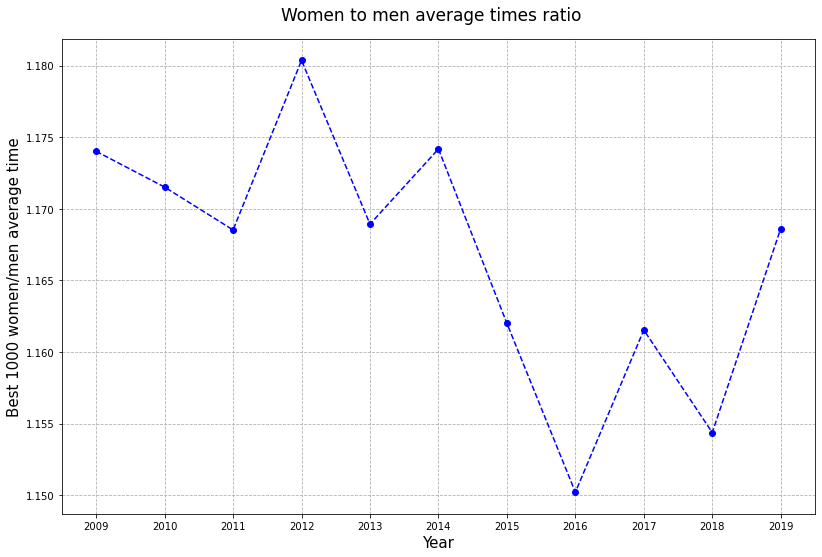

In [10]:
best_1000_men_by_year = {year : results[results['M/F']=='M'] for year, results in results_by_year.items()}
best_1000_women_by_year = {year : results[results['M/F']=='F'] for year, results in results_by_year.items()}
mean_times_men = {year : seconds_to_timestamp(get_mean_official_time(results.head(1000))) for year, results in best_1000_men_by_year.items()}
mean_times_women = {year : seconds_to_timestamp(get_mean_official_time(results.head(1000))) for year, results in best_1000_women_by_year.items()}
women_to_men_time = {year : timestamp_to_seconds(women_time)/timestamp_to_seconds(men_time) for ((year, women_time), men_time) in zip (mean_times_women.items(), mean_times_men.values())}
prepare_basic_line_chart(women_to_men_time, 'Women to men average times ratio', 'Year', 'Best 1000 women/men average time')
plt.savefig('img/women2men_avg_times_ratio.png')

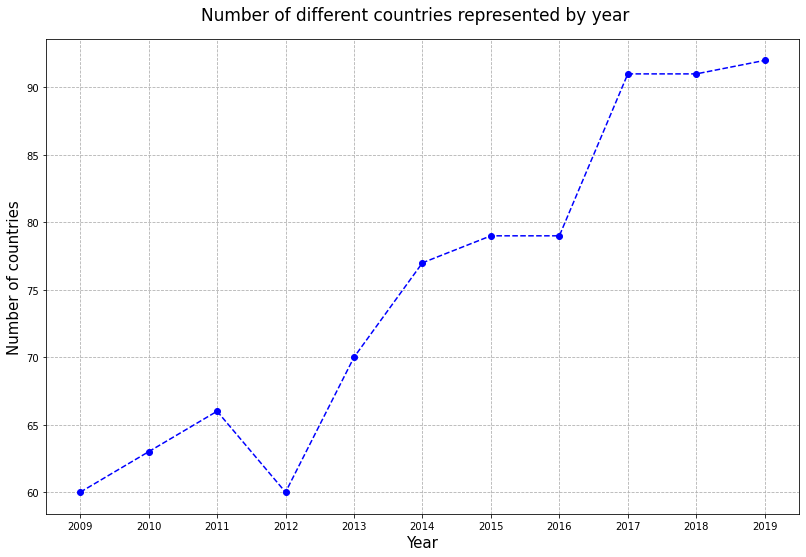

In [11]:
countries_represented_by_year = {year : results['Country'].nunique() for year, results in results_by_year.items()}
prepare_basic_line_chart(countries_represented_by_year, 'Number of different countries represented by year', 'Year', 'Number of countries')
plt.savefig('img/number_of_countries.png')

In [12]:
for year, results in results_by_year.items():
    results['Year'] = np.full(shape=results.shape[0], fill_value=year)
all_results = pd.concat(results_by_year.values(), ignore_index=True)
all_results

,Bib,Name,Age,M/F,City,State,Country,5K,10K,15K,...,25K,30K,35K,40K,Pace,Official Time,Overall,Gender,Division,Year
0,4,"Merga, Deriba",28,M,Addis Ababa,NaN,ETH,0:14:34,0:29:29,0:44:45,...,1:16:10,1:30:59,1:46:22,2:01:24,0:04:55,2:08:42,1,1,1,2009
1,5,"Rono, Daniel",30,M,Keiyo,NaN,KEN,0:14:34,0:29:30,0:44:46,...,1:16:10,1:31:00,1:46:51,2:02:28,0:04:57,2:09:32,2,2,2,2009
2,2,"Hall, Ryan",26,M,Mammoth Lakes,CA,USA,0:14:34,0:29:29,0:44:45,...,1:16:10,1:31:23,1:46:58,2:02:46,0:04:57,2:09:40,3,3,3,2009
3,19,"Kebede, Tekeste",27,M,Addis Ababa,NaN,ETH,0:14:34,0:29:29,0:44:46,...,1:16:10,1:31:23,1:46:58,2:02:46,0:04:57,2:09:49,4,4,4,2009
4,7,"Cheruiyot, Robert",20,M,Bomet,NaN,KEN,0:14:34,0:29:29,0:44:45,...,1:16:10,1:31:26,1:47:23,2:03:11,0:04:58,2:10:06,5,5,5,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272674,23909,"Mcninch, Brett",42,M,New Lebanon,OH,USA,0:27:04,0:55:14,1:30:44,...,3:07:53,4:29:32,5:48:38,6:49:34,0:16:34,7:14:12,26653,14672,1989,2019
272675,23949,"Oconell, Justin",28,M,Franklin,MA,USA,0:50:12,1:37:16,2:26:49,...,4:09:24,5:00:59,5:55:16,-,0:16:39,7:16:19,26654,14673,5092,2019
272676,15946,"Young, John",53,M,Salem,MA,USA,0:39:21,1:24:43,2:12:26,...,4:06:20,5:03:30,6:01:14,-,0:16:42,7:17:35,26655,14674,1858,2019
272677,23937,"Smith, Denise",51,F,Fort Collins,CO,USA,0:39:09,1:22:06,2:11:38,...,4:06:00,5:04:48,6:06:03,-,0:17:01,7:25:39,26656,11982,1200,2019


In [13]:
def prepare_basic_bar_chart(data, title, xlabel, ylabel, dark_color_high_value):
    fig, ax = plt.subplots()
    fig.set_size_inches(18,8)
    fig.suptitle(title, fontsize=17)
    ax.set_axisbelow(True)
    plt.grid(linestyle='-', axis='y', color='#dddddd')
    blues = plt.get_cmap('Blues')
    min_value = min(data.values())
    max_value = max(data.values())
    for key, value in data.items():
        color_index = (value - min_value) / (max_value - min_value) * 0.6 - 0.3
        if not dark_color_high_value:
            color_index = -color_index
        ax.bar(key, value, color = blues(0.7 + color_index))
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)
    ax.set_xticks(list(data.keys()))
    ax.set_xticklabels(list(data.keys()))
    fig.tight_layout(pad=4)
    return fig, ax

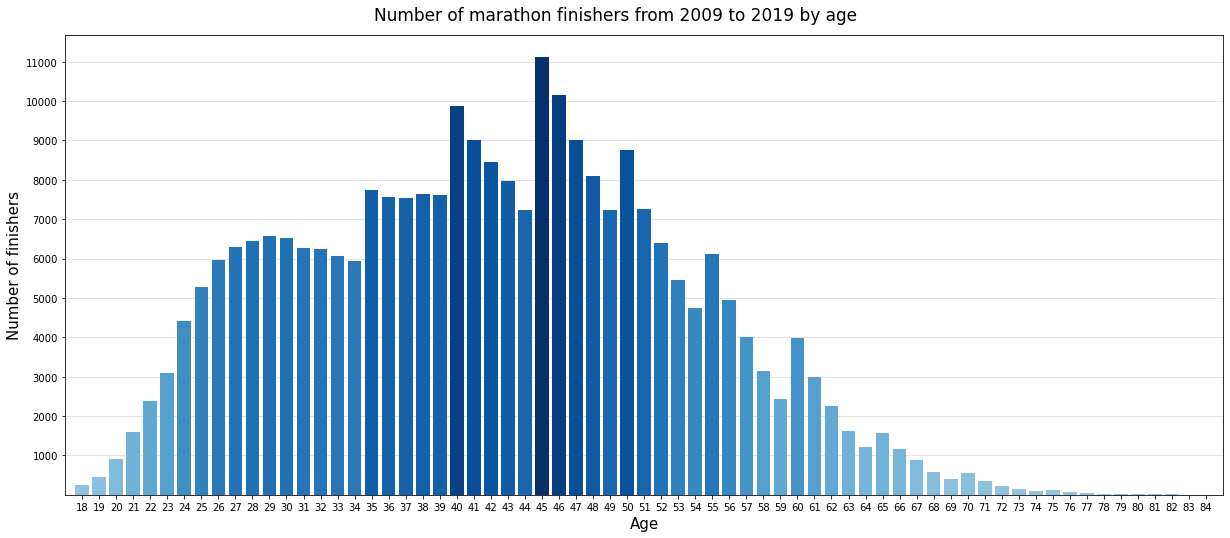

In [14]:
age_participants = all_results.groupby('Age').size()
fig, ax = prepare_basic_bar_chart(age_participants.to_dict(), 'Number of marathon finishers from 2009 to 2019 by age', 'Age', 'Number of finishers', True)
yticks = np.arange(1000, 11001, 1000)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
plt.xlim(age_participants.head(1).index[0] - 1, age_participants.tail(1).index[0] + 1)
plt.savefig('img/finishers_num_by_age.png')

In [15]:
all_results_seconds = all_results.copy(deep=True)
all_results_seconds['Official Time'] = all_results_seconds['Official Time'].apply(timestamp_to_seconds)

In [16]:
def prepare_timestamp_ticks(fig, ax, data, bottom_time, step=1800):
    bottom_sec = timestamp_to_seconds(bottom_time)
    plt.draw()
    y_labels = [label.get_text() for label in ax.get_yticklabels()]
    ax.set_ylim(bottom=bottom_sec)
    y_labels_range = np.arange(bottom_sec, int(y_labels[-1]), step)
    ax.set_yticks(y_labels_range)
    y_labels = [seconds_to_timestamp(label) for label in y_labels_range]
    ax.set_yticklabels(y_labels)
    if type(list(data.keys())[0])==int:
        plt.xlim(sorted(data.keys())[0] - 1, sorted(data.keys())[-1] + 1)
    elif type(list(data.keys())[0])==str:
        plt.xlim(-1,len(data.keys()))

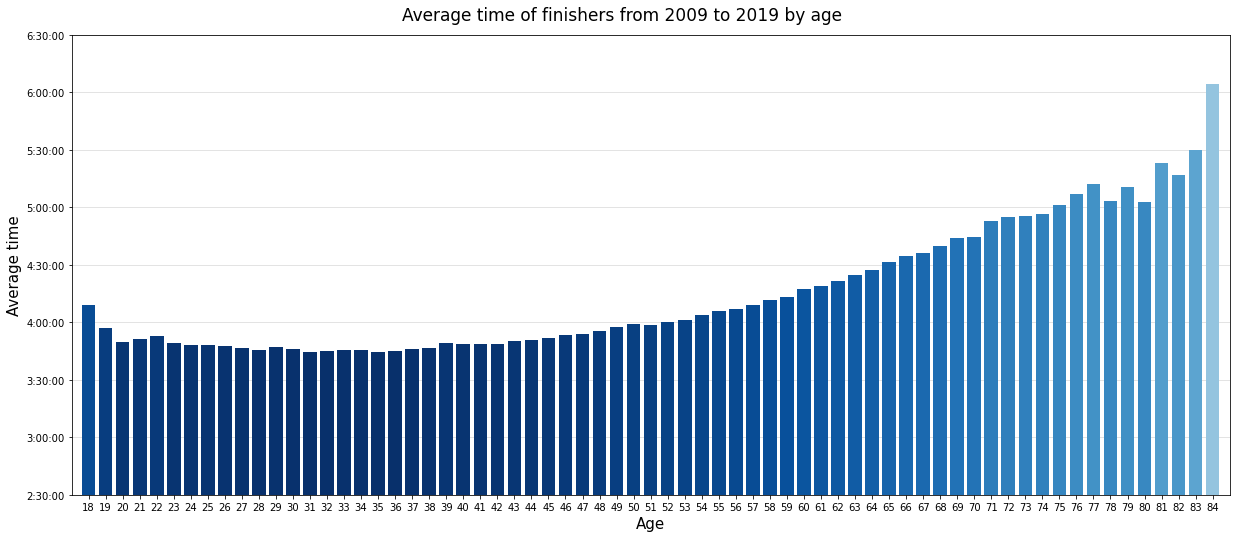

In [17]:
age_mean_times = all_results_seconds.groupby('Age')['Official Time'].mean().to_dict()
fig, ax = prepare_basic_bar_chart(age_mean_times, 'Average time of finishers from 2009 to 2019 by age', 'Age', 'Average time', False)
prepare_timestamp_ticks(fig, ax, age_mean_times, '2:30:00')
plt.savefig('img/avg_finishers_time_by_age.png')

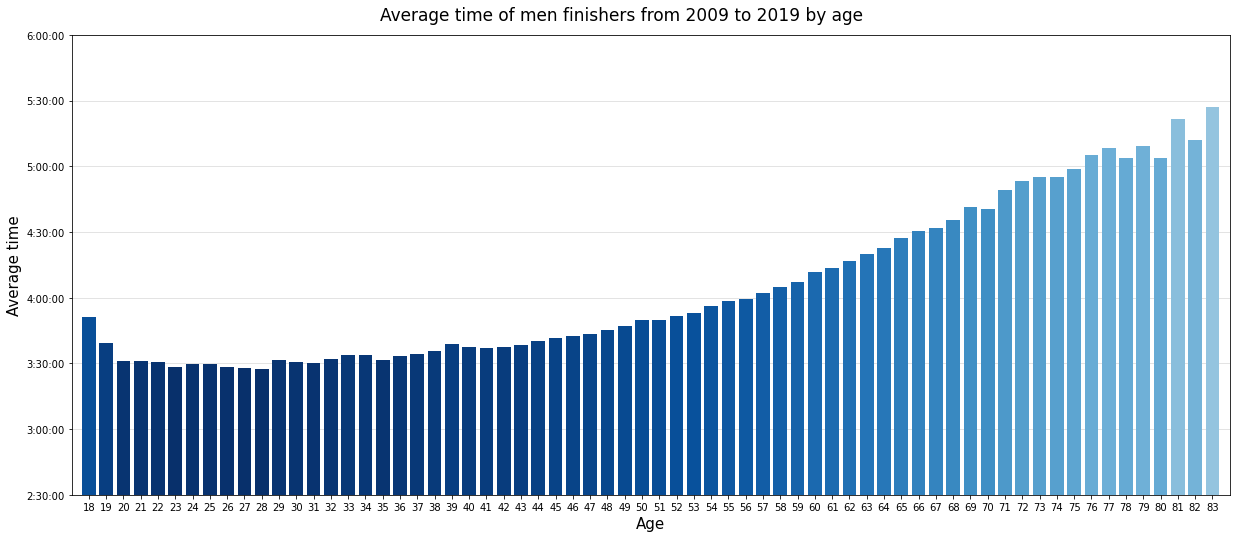

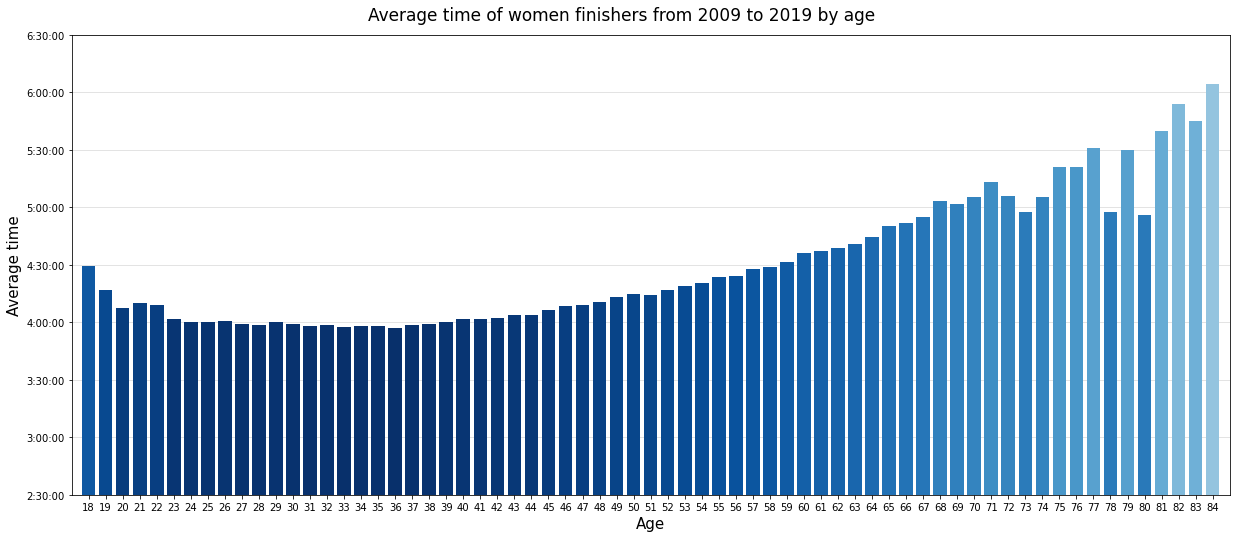

In [18]:
age_mean_times_men = all_results_seconds[all_results_seconds['M/F']=='M'].groupby('Age')['Official Time'].mean().to_dict()
fig, ax = prepare_basic_bar_chart(age_mean_times_men, 'Average time of men finishers from 2009 to 2019 by age', 'Age', 'Average time', False)
prepare_timestamp_ticks(fig, ax, age_mean_times_men, '2:30:00')
plt.savefig('img/avg_men_time_by_age.png')
age_mean_times_women = all_results_seconds[all_results_seconds['M/F']=='F'].groupby('Age')['Official Time'].mean().to_dict()
fig, ax = prepare_basic_bar_chart(age_mean_times_women, 'Average time of women finishers from 2009 to 2019 by age', 'Age', 'Average time', False)
prepare_timestamp_ticks(fig, ax, age_mean_times_women, '2:30:00')
plt.savefig('img/avg_women_time_by_age.png')

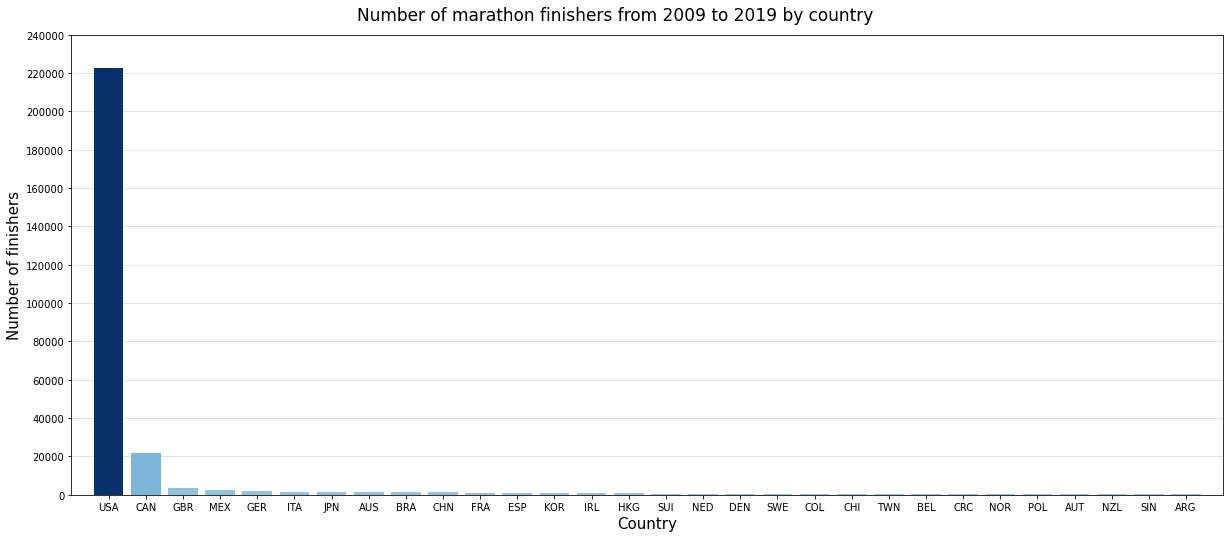

In [19]:
countries_participants = all_results.groupby('Country').size().sort_values(ascending=False)
fig, ax = prepare_basic_bar_chart(countries_participants.head(30).to_dict(), 'Number of marathon finishers from 2009 to 2019 by country', 'Country', 'Number of finishers', True)
yticks = np.arange(0, 240001, 20000)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
plt.xlim(-1, 30)
plt.savefig('img/finishers_num_by_country.png')

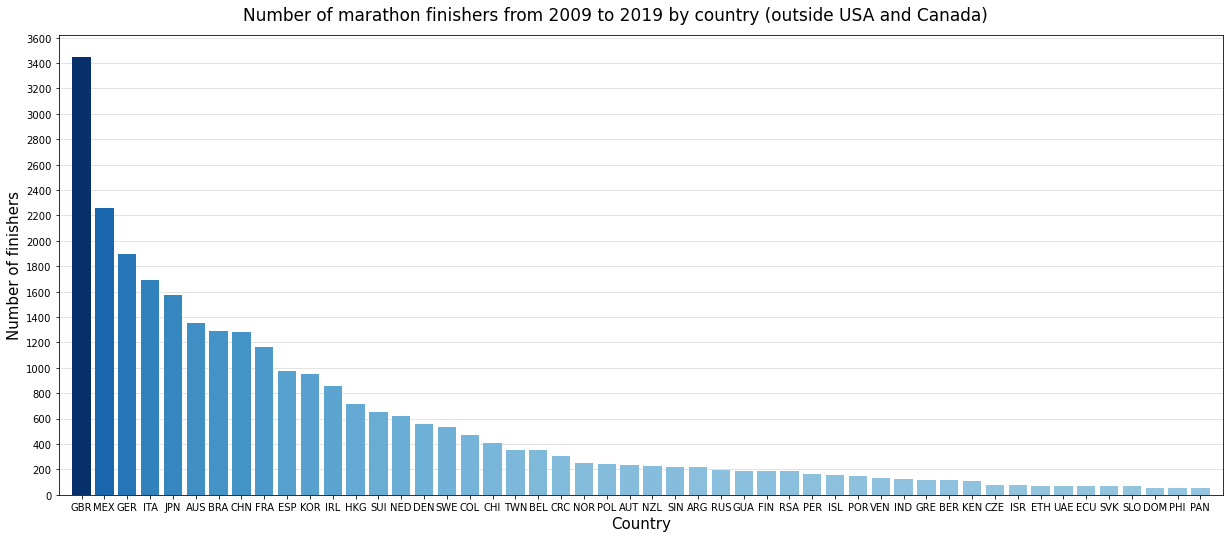

In [20]:
countries_participants = all_results.groupby('Country').size().sort_values(ascending=False)
fig, ax = prepare_basic_bar_chart(countries_participants.head(52).tail(50).to_dict(), 'Number of marathon finishers from 2009 to 2019 by country (outside USA and Canada)', 'Country', 'Number of finishers', True)
yticks = np.arange(0, 3601, 200)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
plt.xlim(-1, 50)
plt.savefig('img/finishers_num_by_country2.png')

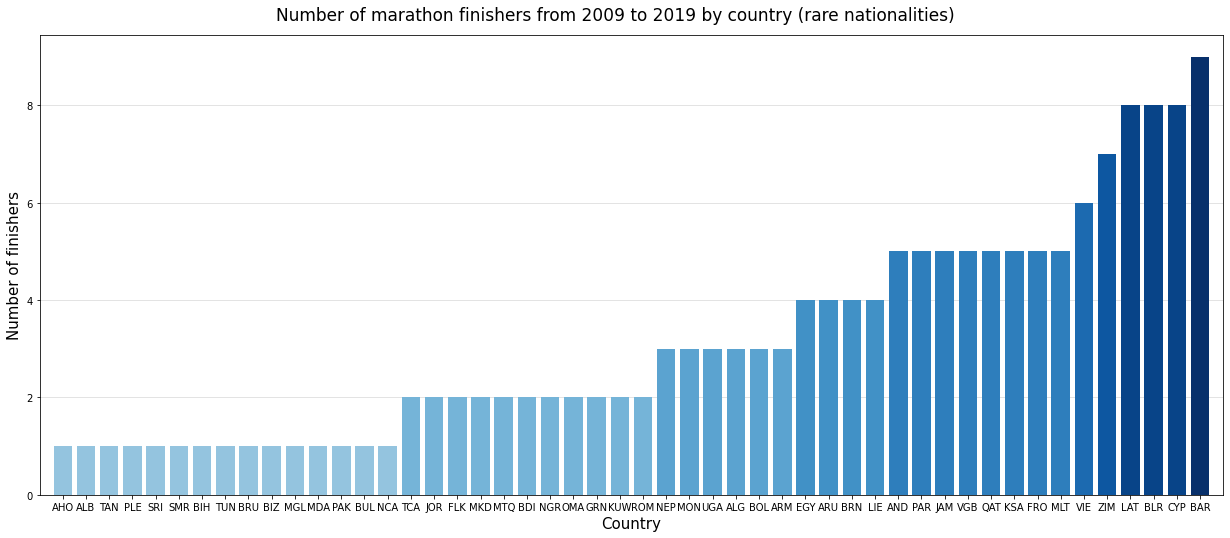

In [21]:
countries_participants = all_results.groupby('Country').size().sort_values(ascending=False)
fig, ax = prepare_basic_bar_chart(countries_participants.tail(50).sort_values(ascending=True).to_dict(), 'Number of marathon finishers from 2009 to 2019 by country (rare nationalities)', 'Country', 'Number of finishers', True)
plt.xlim(-1, 50)
plt.savefig('img/finishers_num_by_country_rare.png')

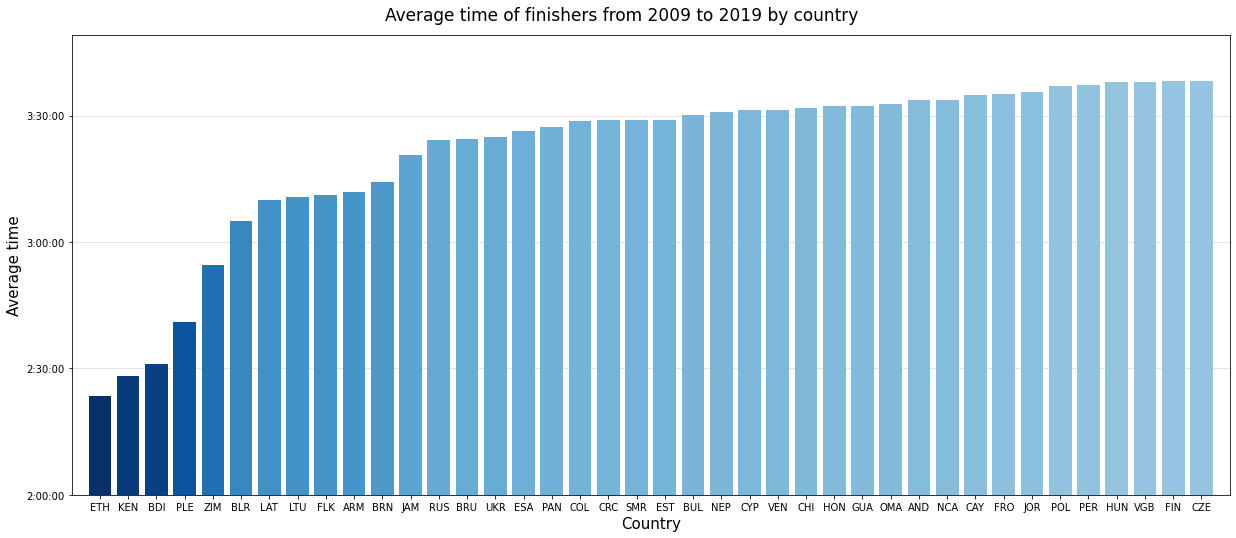

In [22]:
country_mean_times = all_results_seconds.groupby('Country')['Official Time'].mean().sort_values().head(40).to_dict()
fig, ax = prepare_basic_bar_chart(country_mean_times, 'Average time of finishers from 2009 to 2019 by country', 'Country', 'Average time', False)
prepare_timestamp_ticks(fig, ax, country_mean_times, '2:00:00')
plt.savefig('img/avg_time_by_country')

In [23]:
states = pd.read_csv('data/states.csv')
states

,Postal abbreviation,State name,Avg temperature(°F),Avg elevation(m)
0,AK,Alaska,32.03,580
1,AL,Alabama,62.68,150
2,AR,Arkansas,60.09,200
3,AZ,Arizona,65.97,1250
4,CA,California,61.17,880
5,CO,Colorado,46.26,2070
6,CT,Connecticut,48.60,150
7,DE,Delaware,54.48,20
8,FL,Florida,71.80,30
9,GA,Georgia,62.30,180


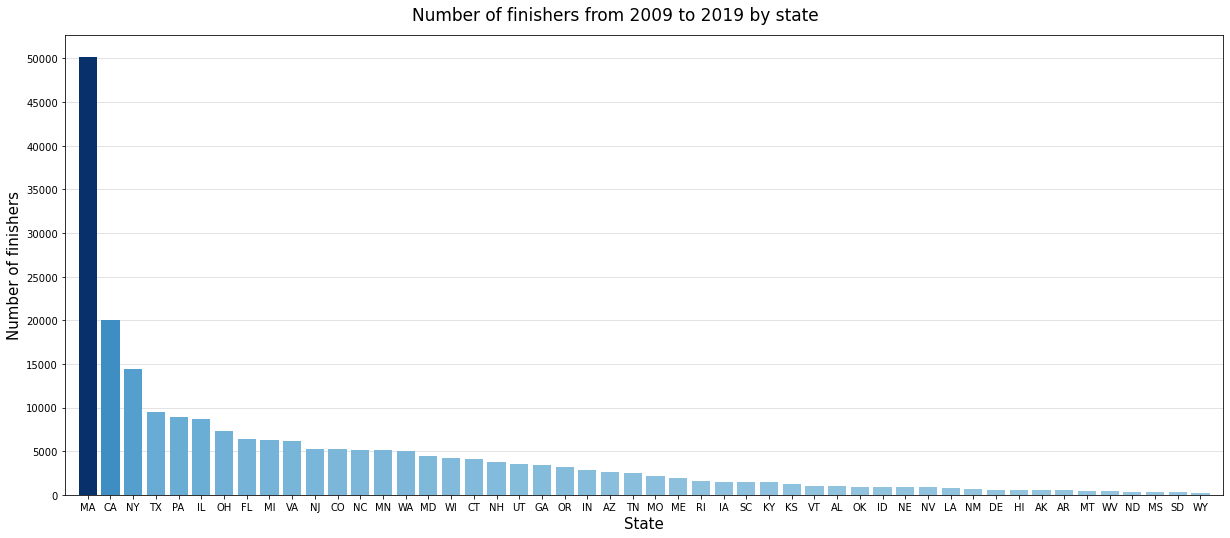

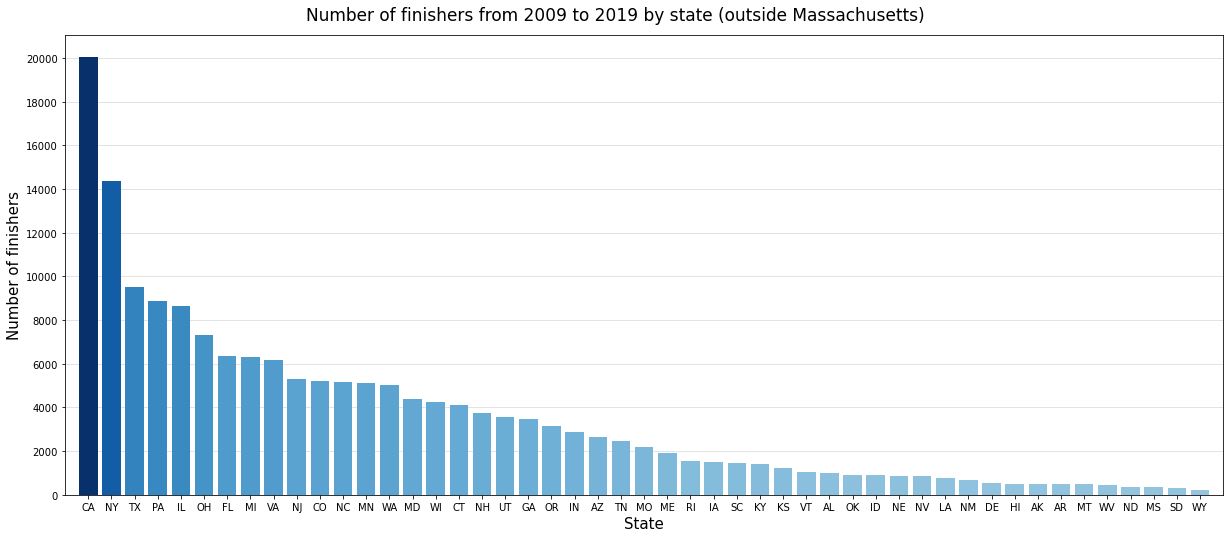

In [24]:
results_with_states = all_results_seconds[all_results_seconds['State'].isin(states['Postal abbreviation'].values)]
states_participants = results_with_states.groupby('State')['Official Time'].size().sort_values(ascending=False).to_dict()
fig, ax = prepare_basic_bar_chart(states_participants, 'Number of finishers from 2009 to 2019 by state', 'State', 'Number of finishers', True)
plt.xlim(-1, states.index.stop)
yticks = np.arange(0, 50001, 5000)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
plt.savefig('img/finishers_num_by_state.png')
results_with_states = all_results_seconds[all_results_seconds['State'].isin(states['Postal abbreviation'].values)]
states_participants = results_with_states.groupby('State')['Official Time'].size().sort_values(ascending=False).iloc[1:].to_dict()
fig, ax = prepare_basic_bar_chart(states_participants, 'Number of finishers from 2009 to 2019 by state (outside Massachusetts)', 'State', 'Number of finishers', True)
plt.xlim(-1, states.index.stop-1)
yticks = np.arange(0, 20001, 2000)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
plt.savefig('img/finishers_num_by_state2.png')

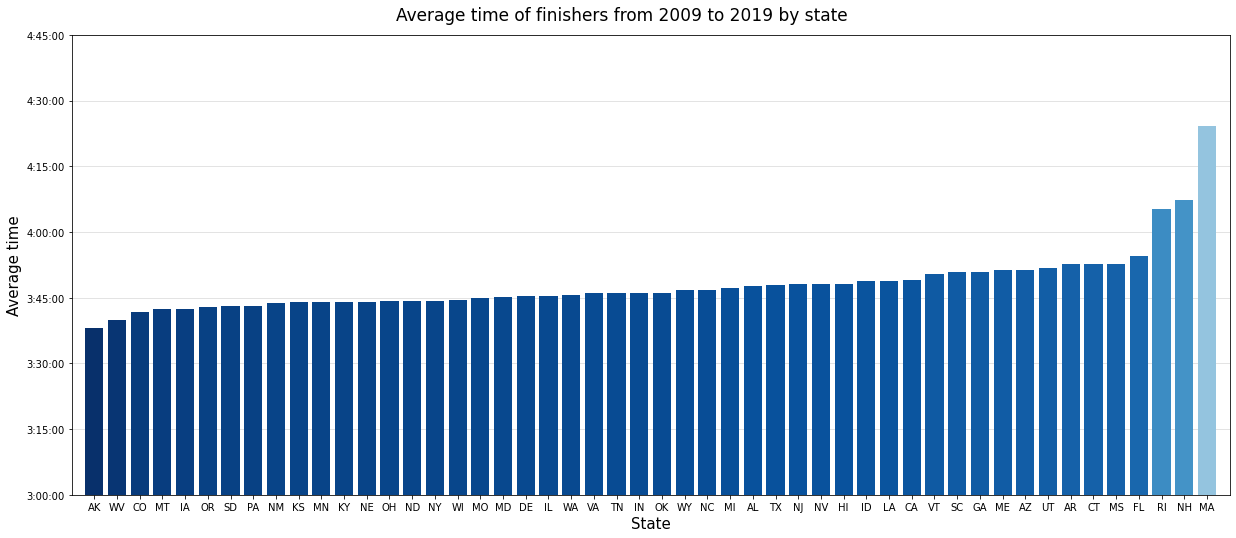

In [25]:
states_by_time = results_with_states.groupby('State')['Official Time'].mean()
states_sorted_by_time = states_by_time.sort_values()
state_mean_times = states_sorted_by_time.to_dict()
fig, ax = prepare_basic_bar_chart(state_mean_times, 'Average time of finishers from 2009 to 2019 by state', 'State', 'Average time', False)
prepare_timestamp_ticks(fig, ax, state_mean_times, '3:00:00', 900)
plt.savefig('img/finishers_time_by_state.png')

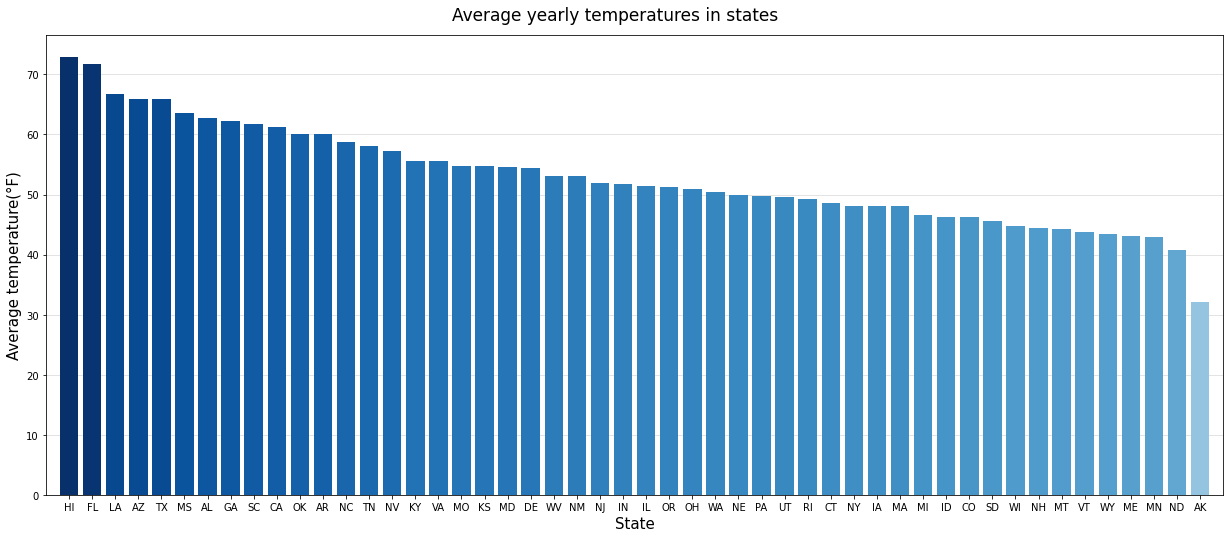

In [26]:
states_sorted_by_temp = states.sort_values('Avg temperature(°F)', ascending=False)
states_temperatures = {abbrev : temperature for abbrev, temperature in zip(states_sorted_by_temp['Postal abbreviation'].values, states_sorted_by_temp['Avg temperature(°F)'].values)}
fig, ax = prepare_basic_bar_chart(states_temperatures, 'Average yearly temperatures in states', 'State', 'Average temperature(°F)', True)
plt.xlim(-1, len(states_temperatures))
plt.savefig('img/states_temp.png')

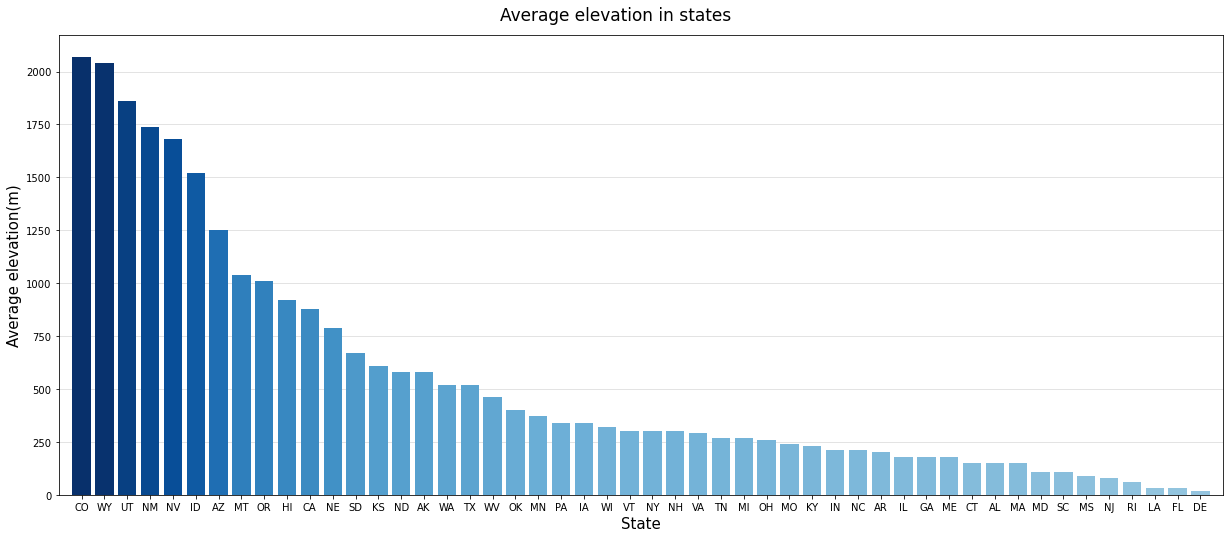

In [27]:
states_sorted_by_elev = states.sort_values('Avg elevation(m)', ascending=False)
states_elevations = {abbrev : elev for abbrev, elev in zip(states_sorted_by_elev['Postal abbreviation'].values, states_sorted_by_elev['Avg elevation(m)'].values)}
fig, ax = prepare_basic_bar_chart(states_elevations, 'Average elevation in states', 'State', 'Average elevation(m)', True)
plt.xlim(-1, len(states_elevations))
plt.savefig('img/states_elev.png')

In [28]:
states['Avg time'] = states_by_time.values
states_indexed = states.set_index('Postal abbreviation')[['Avg temperature(°F)', 'Avg elevation(m)', 'Avg time']]
states_indexed.corr()

,Avg temperature(°F),Avg elevation(m),Avg time
Avg temperature(°F),1.000000,-0.168689,0.107559
Avg elevation(m),-0.168689,1.000000,-0.204355
Avg time,0.107559,-0.204355,1.000000


In [29]:
all_results[all_results['Country'].isin(list(country_mean_times.keys())[:10])].groupby('Country')['Name'].nunique().sort_values(ascending=False)

Country
KEN    74
ETH    52
LTU    27
LAT     8
BLR     6
ZIM     5
ARM     3
FLK     2
BDI     2
PLE     1
Name: Name, dtype: int64

In [30]:
all_results[all_results['Country']=='BDI'][['Name', 'Age', 'M/F', 'Official Time', 'Overall', 'Gender', 'Year']]

,Name,Age,M/F,Official Time,Overall,Gender,Year
91110,"Nukuri-Johnson, Diane",28,F,2:29:54,82,8,2013
193855,"Nukuri, Diane",32,F,2:32:24,75,9,2017


In [31]:
all_results[all_results['Country']=='PLE'][['Name', 'Age', 'M/F', 'Official Time', 'Overall', 'Gender', 'Year']]

,Name,Age,M/F,Official Time,Overall,Gender,Year
246454,"Shana'A, Tha'Er",29,M,2:41:03,432,402,2019


In [32]:
all_results[all_results['Country']=='ZIM'][['Name', 'Age', 'M/F', 'Official Time', 'Overall', 'Gender', 'Year']]

,Name,Age,M/F,Official Time,Overall,Gender,Year
1659,"Edmondson, Andrew R.",50,M,3:02:56,1660,1572,2009
2434,"Colegrave, Colin J.",38,M,3:08:22,2434,2295,2009
8869,"Colegrave, Debbie M.",41,F,3:35:22,8867,1845,2009
22863,"Nyasango, Cutbert",27,M,2:12:40,11,11,2010
122030,"Marais, Paul",46,M,3:43:16,13402,9174,2014
167161,"Nyasango, Cutbert",33,M,2:22:02,11,11,2016
193794,"Nyasango, Cutbert",34,M,2:17:40,14,14,2017


In [33]:
all_results[all_results['Country']=='BLR'][['Name', 'Age', 'M/F', 'Official Time', 'Overall', 'Gender', 'Year']]

,Name,Age,M/F,Official Time,Overall,Gender,Year
108661,"Duliba, Aleksandra",26,F,2:21:29,33,5,2014
140630,"Duliba, Aleksandra",27,F,2:29:23,78,11,2015
224035,"Stankevich, Halina",32,F,3:12:41,3845,371,2018
225902,"Vialichka, Pavel",35,M,3:21:33,5712,4755,2018
225907,"Kasabutskaya, Ala",32,F,3:21:36,5717,958,2018
247608,"Svechnikau, Anton",27,M,2:54:21,1586,1491,2019
249432,"Bagryantseva, Olga",38,F,3:04:53,3410,273,2019
261277,"Vialichka, Pavel",36,M,3:53:03,15255,9688,2019


In [34]:
print('KEN: ', all_results[all_results['Country']=='KEN']['Name'].nunique())
print('ETH: ', all_results[all_results['Country']=='ETH']['Name'].nunique())

KEN:  74
ETH:  52


In [35]:
weather = pd.read_csv('data/weather.csv')
weather

,Year,Temperature(°F),Sky,Humidity(%)
0,2019,58,overcast,87
1,2018,43,heavy rain,89
2,2017,72,clear,37
3,2016,67,clear,28
4,2015,41,light rain,93
5,2014,50,clear,24
6,2013,48,mostly cloudy,48
7,2012,76,clear,46
8,2011,44,partly cloudy,43
9,2010,47,partly cloudy,50


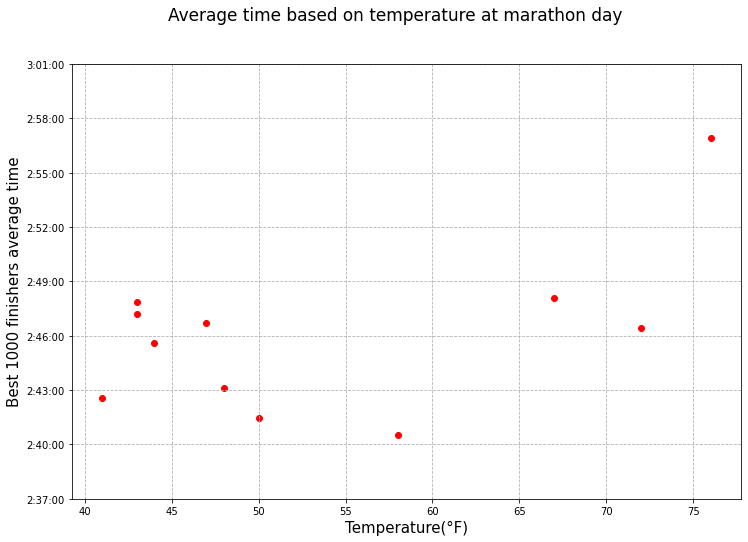

In [36]:
temperatures = weather[['Year', 'Temperature(°F)']]
times = pd.DataFrame(mean_times_best1000, index = ['Average time']).transpose()
times_and_weather = pd.DataFrame(weather.iloc[::-1])
times_and_weather['Average time'] = times['Average time'].to_list()
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
fig.suptitle('Average time based on temperature at marathon day', fontsize=17)
ax.scatter(times_and_weather['Temperature(°F)'].to_list(), times_and_weather['Average time'].to_list(), color='r')
ax.set_xlabel('Temperature(°F)', fontsize=15)
ax.set_ylabel('Best 1000 finishers average time', fontsize=15)
plt.draw()
y_labels = [label.get_text() for label in ax.get_yticklabels()]
y_labels_range = np.arange(60*round(int(y_labels[0])/60), int(y_labels[-1]) + 180, 180)
ax.set_yticks(y_labels_range)
y_labels = [seconds_to_timestamp(label) for label in y_labels_range]
ax.set_yticklabels(y_labels)
plt.grid(linestyle='--')
plt.savefig('img/time_by_weather.png')

In [37]:
sky_conditions_rates = {'clear' : 5, 'partly cloudy' : 4, 'mostly cloudy' : 3, 'overcast' : 2, 'light rain' : 1, 'heavy rain' : 0}
def get_sky_conditions_rates(conditions):
    return sky_conditions_rates[conditions]
times_and_weather.corr()

,Year,Temperature(°F),Humidity(%),Average time
Year,1.000000,0.281032,0.282001,-0.340693
Temperature(°F),0.281032,1.000000,-0.462522,0.526547
Humidity(%),0.282001,-0.462522,1.000000,-0.212815
Average time,-0.340693,0.526547,-0.212815,1.000000


In [38]:
all_results_best = pd.concat([res.head(1000) for res in results_by_year.values()])
best_participant_names_occurences = all_results_best['Name'].value_counts()
frequent_participant_names = [p[0] for p in best_participant_names_occurences.iteritems() if p[1]>=7]
all_results_best_frequent = all_results_best[all_results_best['Name'].isin(frequent_participant_names)]
all_results_best_seconds = all_results_best_frequent.copy(deep=True)
all_results_best_seconds['Official Time'] = all_results_best_seconds['Official Time'].apply(timestamp_to_seconds)
names = all_results_best_seconds.sort_values('Official Time')['Name'].drop_duplicates().head(6)
results_dict = {name : all_results_best_seconds[all_results_best_seconds['Name']==name] for name in names}

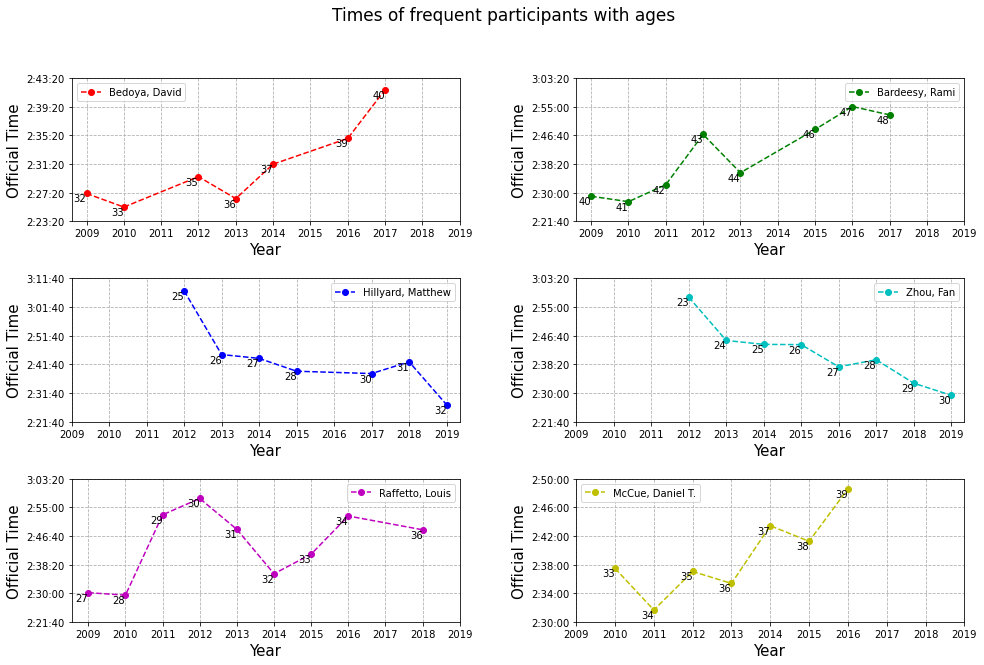

In [39]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.set_size_inches(16,10)
fig.tight_layout(pad=4)
fig.suptitle('Times of frequent participants with ages', fontsize=17)
for index, (name, results) in enumerate(results_dict.items()):
    ax = fig.add_subplot(3, 2, index+1)    
    ax.plot(results['Year'], results['Official Time'], linestyle='--', marker='o', color=colors[index], label=name)
    for r in results.iterrows():
        ax.annotate(r[1]['Age'], (r[1]['Year'], r[1]['Official Time']), horizontalalignment='right', verticalalignment='top')
    ax.set_xlabel('Year', fontsize=15)
    ax.set_ylabel('Official Time', fontsize=15)
    ax.set_xticks(np.arange(2009, 2020))
    ax.set_xticklabels(np.arange(2009, 2020))
    ax.legend()
    plt.grid(linestyle='--')
    plt.draw()
    y_labels = [label.get_text() for label in ax.get_yticklabels()]
    ax.set_ylim(bottom=int(y_labels[0]))
    y_labels_range = np.linspace(int(y_labels[0]), int(y_labels[-1]), 6)
    ax.set_yticks(y_labels_range)
    y_labels = [seconds_to_timestamp(label) for label in y_labels_range]
    ax.set_yticklabels(y_labels)
plt.savefig('img/frequent_participants_times.png')

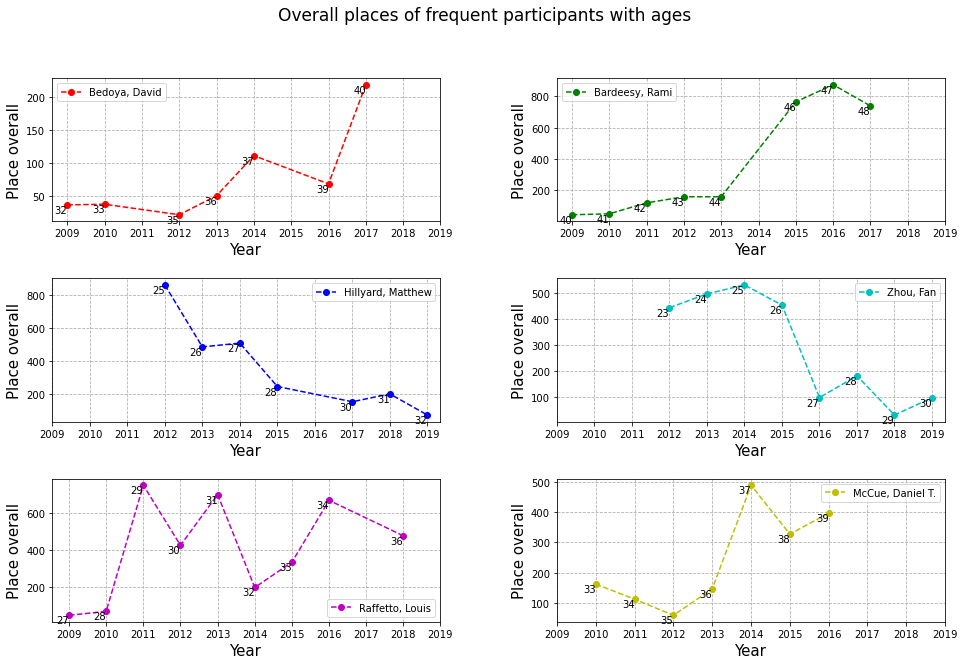

In [40]:
colors = ['r', 'g', 'b', 'c', 'm', 'y']
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.3)
fig.set_size_inches(16,10)
fig.tight_layout(pad=4)
fig.suptitle('Overall places of frequent participants with ages', fontsize=17)
for index, (name, results) in enumerate(results_dict.items()):
    ax = fig.add_subplot(3, 2, index+1)    
    ax.plot(results['Year'], results['Overall'], linestyle='--', marker='o', color=colors[index], label=name)
    for r in results.iterrows():
        ax.annotate(r[1]['Age'], (r[1]['Year'], r[1]['Overall']), horizontalalignment='right', verticalalignment='top')
    ax.set_xlabel('Year', fontsize=15)
    ax.set_ylabel('Place overall', fontsize=15)
    ax.set_xticks(np.arange(2009, 2020))
    ax.set_xticklabels(np.arange(2009, 2020))
    ax.legend()
    plt.grid(linestyle='--')
plt.savefig('img/frequent_participants_places.png')

In [120]:
top_10_by_year = {year : results.head(10) for year, results in results_by_year.items()}

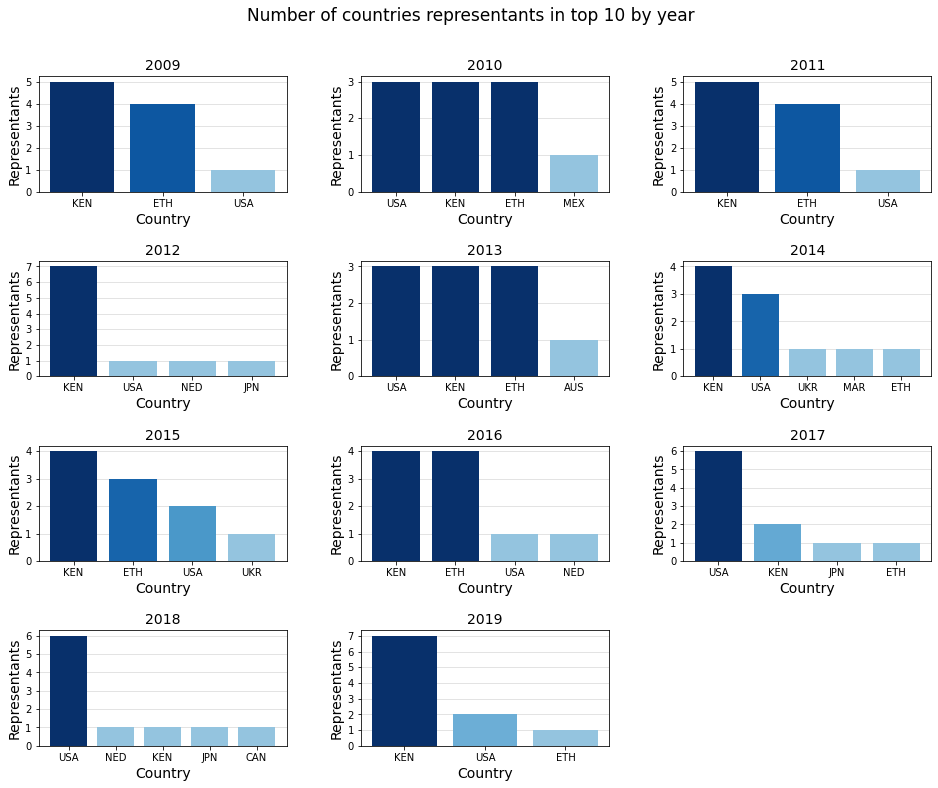

In [121]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.6, wspace=0.3)
fig.set_size_inches(16,12)
fig.tight_layout()
fig.suptitle('Number of countries representants in top 10 by year', fontsize=17)
fig.subplots_adjust(top=0.90)
for index, (year, results) in enumerate(top_10_by_year.items()):
    ax = fig.add_subplot(4, 3, index+1)
    ax.set_title(year, fontsize=14)
    results_by_country = results.groupby('Country').size().sort_values(ascending=False).to_dict()
    ax.set_axisbelow(True)
    plt.grid(linestyle='-', axis='y', color='#dddddd')
    blues = plt.get_cmap('Blues')
    min_value = min(results_by_country.values())
    max_value = max(results_by_country.values())
    for key, value in results_by_country.items():
        color_index = (value - min_value) / (max_value - min_value) * 0.6 - 0.3
        ax.bar(key, value, color = blues(0.7 + color_index))
    ax.set_xlabel('Country', fontsize=14)
    ax.set_ylabel('Representants', fontsize=14)
    ax.set_yticks(np.arange(0, max_value+1))
    ax.set_yticklabels(np.arange(0, max_value+1))
plt.savefig('img/top_10_countries_by_year.png')

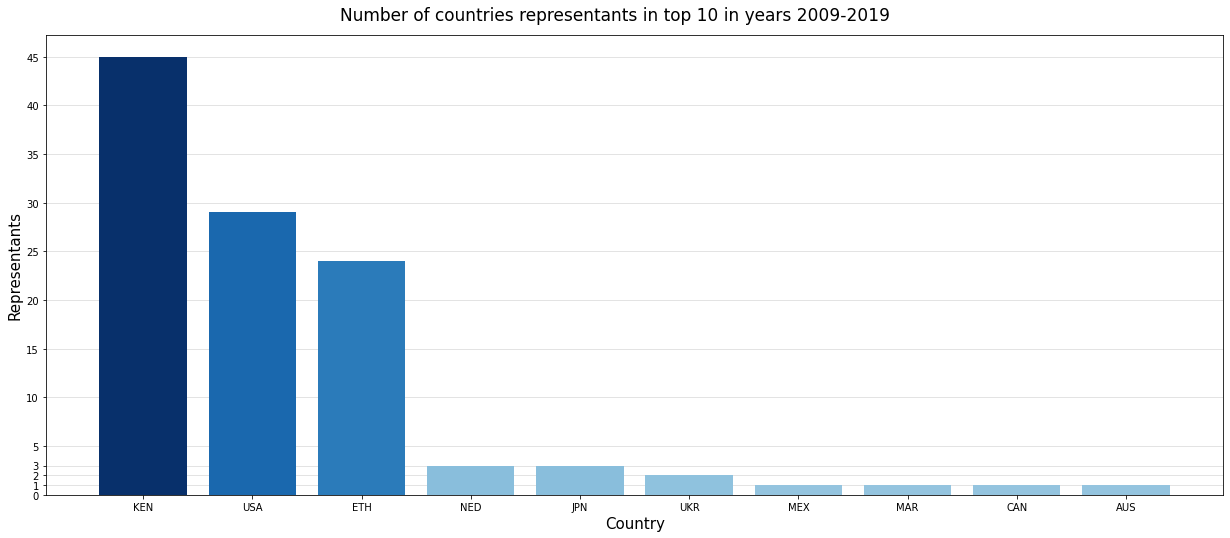

In [122]:
all_top_10s = pd.concat([res for res in top_10_by_year.values()])
all_top_10s_by_country = all_top_10s.groupby('Country').size().sort_values(ascending=False).to_dict()
prepare_basic_bar_chart(all_top_10s_by_country, 'Number of countries representants in top 10 in years 2009-2019', 'Country', 'Representants', True)
plt.yticks(list(np.arange(0, max(plt.yticks()[0]), 5)) + [1,2,3])
plt.savefig('img/all_top_10_countries_representants.png')

In [123]:
top_10_names = all_top_10s.groupby('Name').size().sort_values()
frequent_top_10_names = [name[0] for name in top_10_names.iteritems() if name[1]>=2]
participants_starts = {}
for participant in all_top_10s[all_top_10s['Name'].isin(frequent_top_10_names)].iterrows():
    participant_data = participant[1]
    participant_name = participant_data['Name']
    if participant_name in participants_starts:
        participants_starts[participant_name].append(str(participant_data['Year']))
    else:
        participants_starts[participant_name]=[str(participant_data['Year'])]

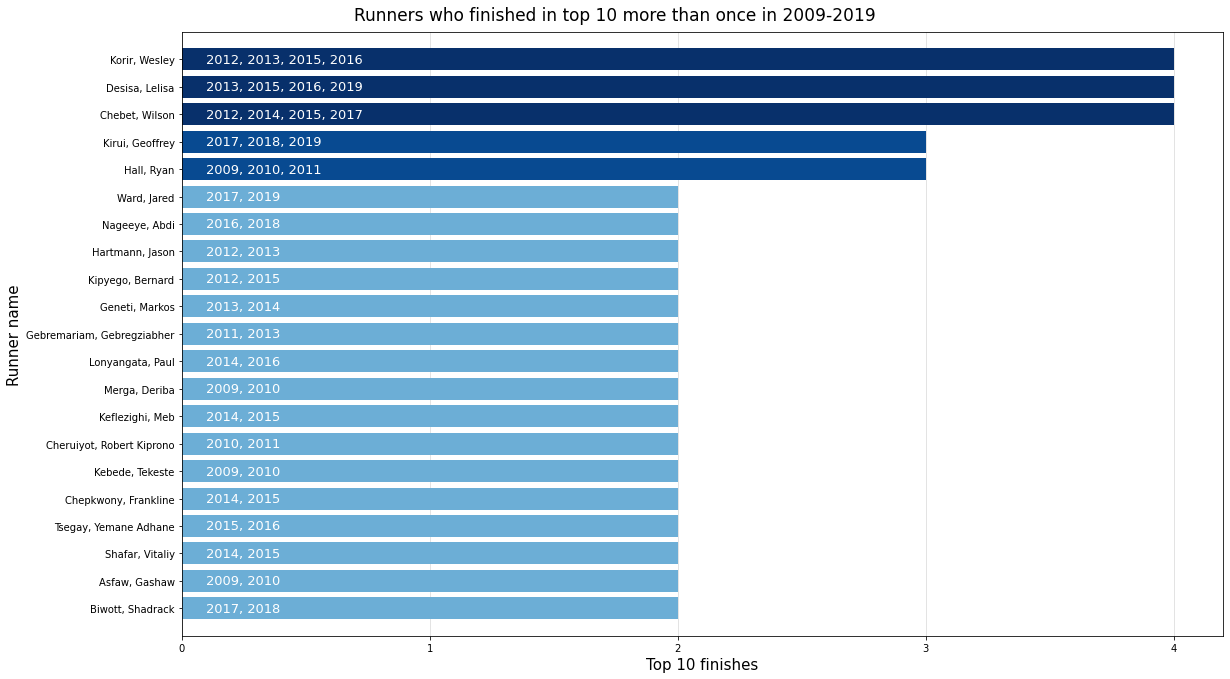

In [130]:
top_10_starts = top_10_names.to_dict()
top_10_starts = {name : finishes for name, finishes in top_10_starts.items() if name in frequent_top_10_names}
fig, ax = plt.subplots()
fig.set_size_inches(18,10)
fig.suptitle('Runners who finished in top 10 more than once in 2009-2019', fontsize=17)
ax.set_axisbelow(True)
plt.grid(linestyle='-', axis='x', color='#dddddd')
blues = plt.get_cmap('Blues')
min_value = min(top_10_starts.values())
max_value = max(top_10_starts.values())
for key, value in top_10_starts.items():
    color_index = (value - min_value) / (max_value - min_value) * 0.8 - 0.2
    ax.barh(key, value, color = blues(0.7 + color_index))
    ax.annotate(', '.join(participants_starts[key]), (0.1, key), color='w', va='center', size=13)
ax.set_ylabel('Runner name', fontsize=15)
ax.set_xlabel('Top 10 finishes', fontsize=15)
ax.set_yticks(list(top_10_starts.keys()))
ax.set_yticklabels(list(top_10_starts.keys()))
ax.set_xticks(np.arange(0,max_value+1))
ax.set_xticklabels(np.arange(0,max_value+1))
ax.set_ylim(-1, len(top_10_starts.values()))
fig.tight_layout(pad=4)
plt.savefig('img/top_10_finishers_more_than_once.png')

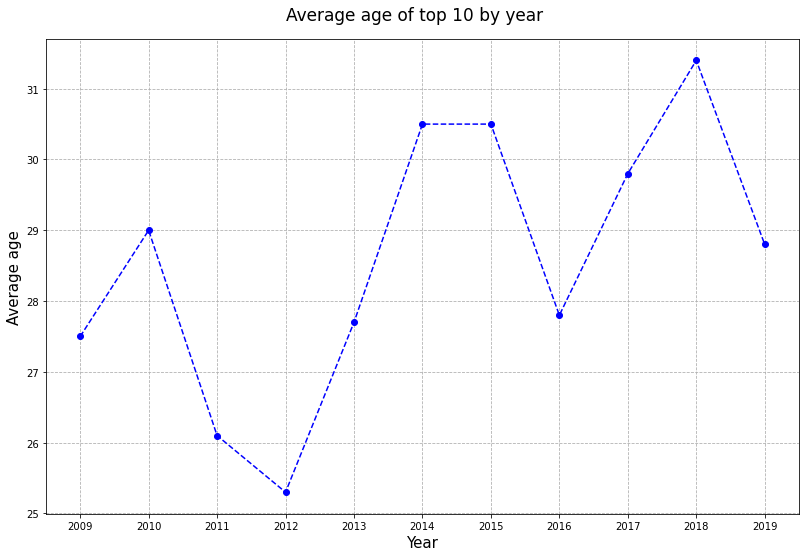

In [125]:
top_10s_avg_age = {year : results['Age'].mean() for year, results in top_10_by_year.items()}
prepare_basic_line_chart(top_10s_avg_age, 'Average age of top 10 by year', 'Year', 'Average age')
plt.savefig('img/avg_age_top_10_by_year.png')

In [126]:
top_3_by_year = {year : results.head(3) for year, results in results_by_year.items()}
all_top_3s = pd.concat([res for res in top_3_by_year.values()])
top_3_names = all_top_3s.groupby('Name').size().sort_values(ascending=False)
frequent_top_3_names = [name[0] for name in top_3_names.iteritems() if name[1]>=2]
runners_places = {}
for name in top_3_names.index:
    if name in frequent_top_3_names:
        filtered_top_3s = all_top_3s[all_top_3s['Name']==name]
        filtered_top_3s = filtered_top_3s[filtered_top_3s['Name'].isin(frequent_top_3_names)]
        runners_places [name] = filtered_top_3s['Overall'].value_counts()
pd.DataFrame(runners_places).fillna(0).transpose().astype(int).sort_values(by=[1,2,3], ascending=False)

,1,2,3
"Desisa, Lelisa",2,2,0
"Kirui, Geoffrey",1,1,0
"Merga, Deriba",1,0,1
"Tsegay, Yemane Adhane",0,1,1
"Chebet, Wilson",0,1,1
"Gebremariam, Gebregziabher",0,0,2


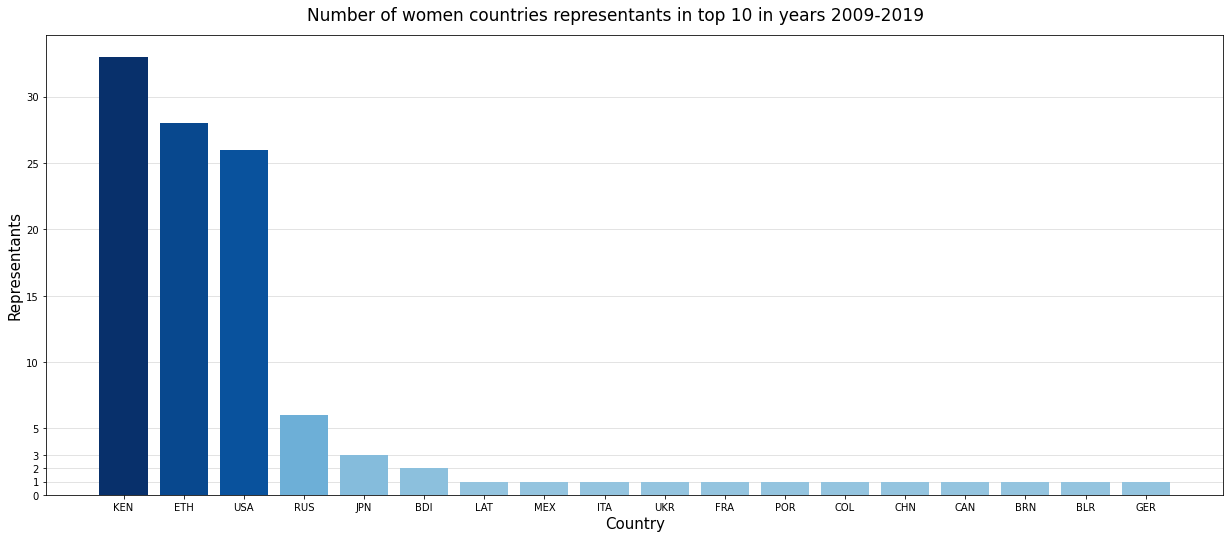

In [127]:
top_10_women_by_year = {year : results[results['M/F']=='F'].head(10) for year, results in results_by_year.items()}
all_women_top_10s = pd.concat([res for res in top_10_women_by_year.values()])
all_women_top_10s_by_country = all_women_top_10s.groupby('Country').size().sort_values(ascending=False).to_dict()
prepare_basic_bar_chart(all_women_top_10s_by_country, 'Number of women countries representants in top 10 in years 2009-2019', 'Country', 'Representants', True)
plt.yticks(list(np.arange(0, max(plt.yticks()[0]), 5)) + [1,2,3])
plt.savefig('img/women_top_10_countries_representants.png')

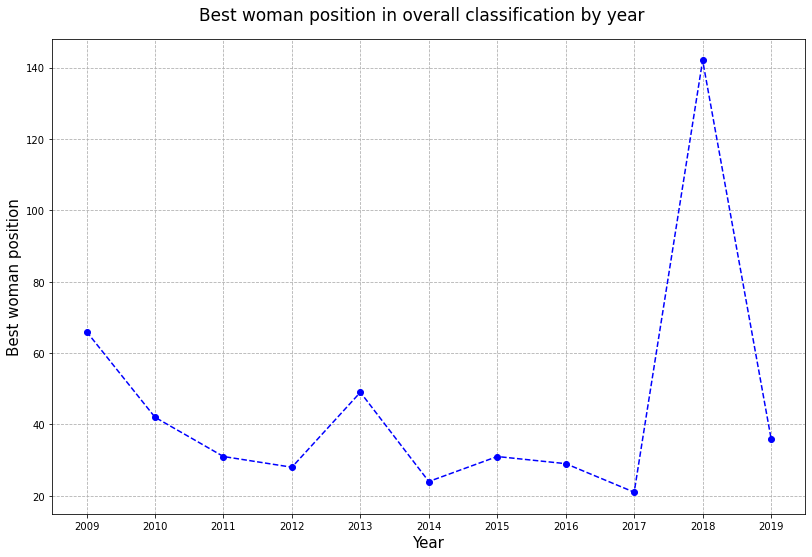

In [128]:
women_best_results_by_year = {year : results[results['M/F']=='F'].head(1)['Overall'].values[0] for year, results in results_by_year.items()}
prepare_basic_line_chart(women_best_results_by_year, 'Best woman position in overall classification by year', 'Year', 'Best woman position')
plt.savefig('img/best_woman_overall_by_year.png')

In [129]:
weather_by_year = weather.copy(deep=True)
weather_by_year['Best woman overall'] = women_best_results_by_year.values()
weather_by_year.corr()

,Year,Temperature(°F),Humidity(%),Best woman overall
Year,1.000000,0.281032,0.282001,-0.178240
Temperature(°F),0.281032,1.000000,-0.462522,-0.212916
Humidity(%),0.282001,-0.462522,1.000000,0.232521
Best woman overall,-0.178240,-0.212916,0.232521,1.000000
